## Chunk Model with Nouns and Verbs: Mallet

## Resources

In [1]:
import pickle
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

## Get Data

In [2]:
# Get it back
with open("20240220_PhD_ChkLem-NV.txt", "rb") as fp:   # Unpickling
    data_lemmatized = pickle.load(fp)

## LDA Mallet Model

This code adapted from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [3]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [5]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [6]:
# Run model
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=12, id2word=id2word)

Mallet LDA: 12 topics, 4 topic bits, 1111 topic mask
Data loaded.
max tokens: 80
total tokens: 167466
<10> LL/token: -9.58352
<20> LL/token: -9.13584
<30> LL/token: -8.81427
<40> LL/token: -8.59468

0	4.16667	church year government state settle people form labour settlement law person number build raise preach office member united_state settler support 
1	4.16667	place return work inhabitant man condition time person enjoy walk question give remember table governor meeting experience advise receive fortune 
2	4.16667	work dollar pay month board day cent sell body bring air wage price food servant eat save blood kind week 
3	4.16667	write letter book give read answer time copy fact paper receive send business live request matter publish age offer law 
4	4.16667	day water ship river hour road side horse pass travel city carry passenger wind bed night distance place sea provision 
5	4.16667	sister give school mind family woman time husband receive teach return number order teacher call gi

<260> LL/token: -8.05368
<270> LL/token: -8.06404
<280> LL/token: -8.05665
<290> LL/token: -8.057

0	4.16667	church government place build state year form settlement office follow number member united_state difficulty preach attend labour settle receive service 
1	4.16667	time place meet mind case order turn end return gentleman manner law fact question party character hold hospital judge opinion 
2	4.16667	work pay day bring board hand business month cent find body call save require wage charge food article servant hold 
3	4.16667	send write letter receive book give read paper friend copy promise answer account interest publish expect nature moodie suffer peace 
4	4.16667	water place river ship side pass road hour fall travel foot day carry passenger wind bank distance fire boat cover 
5	4.16667	sister school give speak door reach visit wait room number teach order begin understand mother attention open train station teacher 
6	4.16667	give family live kind thing bring brother leave h

<510> LL/token: -8.04735
<520> LL/token: -8.04416
<530> LL/token: -8.04255
<540> LL/token: -8.0447

0	4.16667	church government year build form follow number settlement attend office state place receive member preach labour request settle person support 
1	4.16667	time meet mind case place order end return question reason party hospital lead study fact speak enter turn join meeting 
2	4.16667	work pay day board bring money month business cent find body save place wage require charge hand mine food servant 
3	4.16667	send write letter receive book give read friend work paper copy promise answer account expect publish interest respect hope offer 
4	4.16667	water river ship side road hour place pass fall travel fire passenger wind bank distance day foot boat cover sea 
5	4.16667	sister school room door give speak visit wait understand mother reach teach time stand patient station number teacher train remain 
6	4.16667	give family live kind bring time thing brother year leave call health m

<760> LL/token: -8.0451
<770> LL/token: -8.0454
<780> LL/token: -8.04531
<790> LL/token: -8.04306

0	4.16667	church government year place form build follow number settlement settle receive labour member attend person preach service support duty request 
1	4.16667	time mind meet case order return end gentleman turn question reason place rest party speak matter lead study judge opinion 
2	4.16667	work day pay board money cent business find body save bring call hand wage mine month food place servant charge 
3	4.16667	send write letter give receive book read friend paper pleasure interest copy promise work pay account publish opportunity story moodie 
4	4.16667	water river ship side road fall place pass hour passenger foot wind bank distance travel stand boat island cover sea 
5	4.16667	sister school mother room door visit give speak wait reach start teach hospital understand number patient station face continue train 
6	4.16667	give family time bring year live month thing brother kind le

In [10]:
# Show Topics
pprint(sorted(ldamallet.show_topics(formatted=False)))

[(0,
  [('church', 0.0284298944647857),
   ('year', 0.02570177327877091),
   ('place', 0.024840261325292556),
   ('government', 0.02390695670902434),
   ('follow', 0.017158446406777227),
   ('form', 0.016943068418407637),
   ('settlement', 0.014502117883552301),
   ('number', 0.014071361906813124),
   ('build', 0.012635508651015866),
   ('attend', 0.012420130662646278)]),
 (1,
  [('time', 0.060923731388635674),
   ('mind', 0.028182923123670617),
   ('order', 0.022257672439987844),
   ('meet', 0.020814342145244608),
   ('case', 0.02035855363111516),
   ('return', 0.018231540565177756),
   ('end', 0.01815557581282285),
   ('question', 0.012078395624430265),
   ('reason', 0.011546642357945914),
   ('rest', 0.011546642357945914)]),
 (2,
  [('work', 0.07698130345923851),
   ('day', 0.036560442055862535),
   ('man', 0.028082658390734993),
   ('board', 0.019756263719627583),
   ('business', 0.01839376277344637),
   ('hand', 0.017712512300355764),
   ('pay', 0.017334039815305426),
   ('cent', 

In [9]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.487349496491926


In [11]:
# Convert results to lda model format for visualization.
MalletLDA12 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)

In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA12, corpus, id2word, sort_topics=False, mds='mmds')
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.007196 -0.031834       1        1  8.287993
1      0.038321 -0.435070       2        1  8.113102
2     -0.368526 -0.182592       3        1  8.194785
3     -0.199931  0.434849       4        1  8.041417
4      0.308768 -0.364104       5        1  8.583721
5      0.348716 -0.127651       6        1  8.883174
6      0.069222  0.431733       7        1  7.958729
7     -0.232917 -0.396030       8        1  8.248978
8     -0.486648  0.066726       9        1  8.262026
9      0.309859  0.302082      10        1  8.257761
10     0.462389  0.116184      11        1  8.344302
11    -0.256449  0.185707      12        1  8.824011, topic_info=          Term         Freq        Total Category  logprob  loglift
34      sister  1297.000000  1297.000000  Default  30.0000  30.0000
189       work  1221.000000  1221.000000  Default  29.0000  29.0000
135        day  1642.000000  1642.000000  Default  28.0000  28.0000
268       time  1701.000000  1701.000000  Default  27.0000  27.0000
125       send   991.000000   991.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
178      house   229.544770   730.095178  Topic12  -4.2380   1.2706
297      raise   136.292207   218.849084  Topic12  -4.7593   1.9541
1520       pay   210.074454   655.996587  Topic12  -4.3266   1.2890
836       tree   134.242700   218.188931  Topic12  -4.7744   1.9420
937   building   116.821892   196.162267  Topic12  -4.9134   1.9094

[888 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
190       2  1.013025      abide
2069      4  0.997003     accept
761       4  0.240611    account
761       7  0.757744    account
1066      8  0.993475   accustom
...     ...       ...        ...
757       4  0.998028    writing
130       1  0.289936       year
130       7  0.299751       year
130      12  0.409987       year
286      10  0.996897  yesterday

[1100 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

In [28]:
p = pyLDAvis.gensim.prepare(MalletLDA12, corpus, id2word, sort_topics=False, mds='mmds')
pyLDAvis.save_html(p, '20240221_PhD_TopicChkMAL12.html')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [25]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA12, corpus, id2word, sort_topics=False)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.192005  0.124327       1        1  8.287996
1      0.147018  0.174045       2        1  8.113098
2     -0.055892 -0.125089       3        1  8.194786
3      0.095580  0.224793       4        1  8.041416
4     -0.084380 -0.213620       5        1  8.583728
5      0.104506 -0.018496       6        1  8.883174
6      0.048751  0.205241       7        1  7.958733
7     -0.203958 -0.015075       8        1  8.248977
8      0.088541 -0.052452       9        1  8.262025
9      0.095331 -0.222390      10        1  8.257762
10     0.233456 -0.109780      11        1  8.344299
11    -0.276947  0.028497      12        1  8.824006, topic_info=          Term         Freq        Total Category  logprob  loglift
34      sister  1297.000000  1297.000000  Default  30.0000  30.0000
189       work  1221.000000  1221.000000  Default  29.0000  29.0000
135        day  1642.000000  1642.000000  Default  28.0000  28.0000
268       time  1701.000000  1701.000000  Default  27.0000  27.0000
125       send   991.000000   991.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
178      house   229.544627   730.095067  Topic12  -4.2380   1.2706
297      raise   136.292122   218.849032  Topic12  -4.7593   1.9541
1520       pay   210.074324   655.996459  Topic12  -4.3266   1.2890
836       tree   134.242617   218.188913  Topic12  -4.7744   1.9420
937   building   116.821819   196.162226  Topic12  -4.9134   1.9094

[883 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
190       2  1.013026      abide
2069      4  0.997003     accept
761       4  0.240610    account
761       7  0.757743    account
1066      8  0.993475   accustom
...     ...       ...        ...
757       4  0.998028    writing
130       1  0.289936       year
130       7  0.299751       year
130      12  0.409987       year
286      10  0.996897  yesterday

[1095 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

This warning is not serious. See https://www.pythonclear.com/errors/runtimewarning-divide-by-zero-encountered-in-log/ for details.

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [16]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=17, 
                                                        step=1)

Mallet LDA: 5 topics, 3 topic bits, 111 topic mask
Data loaded.
max tokens: 80
total tokens: 167466
<10> LL/token: -9.06443
<20> LL/token: -8.80672
<30> LL/token: -8.59521
<40> LL/token: -8.42752

0	10	country people year state place church person government law settle receive land form obtain follow expect settlement labour office time 
1	10	letter time write friend day send book order ship give read board bring bed hand thing child work leave copy 
2	10	sister land year dollar money pay work acre house farm give sell pound school river buy wood family room place 
3	10	child give time life call girl heart mother boy hear speak fear family eye death mind man head wife meet 
4	10	day week send hear time water feel work return night give write place walk travel find foot hour fall bring 

<50> LL/token: -8.31074
<60> LL/token: -8.22921
<70> LL/token: -8.17304
<80> LL/token: -8.13804
<90> LL/token: -8.10981

0	10	country people state person year place church government settle law follow b

<560> LL/token: -7.94106
<570> LL/token: -7.93925
<580> LL/token: -7.94254
<590> LL/token: -7.94259

0	10	people country state place church government number settle law year person world case form follow man attend obtain settlement labour 
1	10	time give send write letter friend receive work return leave find thing order expect book live brother ship bring read 
2	10	year land country dollar pay work money house month acre farm bring sell place family pound wood buy board business 
3	10	sister child man life hear school give feel hand mother call mind visit girl woman family heart speak boy wife 
4	10	day week place water room night morning pass fall hour walk time bed side rest evening travel reach arrive stand 

<600> LL/token: -7.94081
<610> LL/token: -7.93946
<620> LL/token: -7.94165
<630> LL/token: -7.93969
<640> LL/token: -7.93965

0	10	people state country church year place government number person settle law world case man form attend obtain follow settlement labour 
1	10	time

<110> LL/token: -8.08004
<120> LL/token: -8.06032
<130> LL/token: -8.04954
<140> LL/token: -8.03925

0	8.33333	place house country town river people fall settle build travel state road form number city arrive government lie follow side 
1	8.33333	year land country dollar pay money work month acre farm kind sell pound bring live buy grow cent obtain horse 
2	8.33333	time send write letter hear give feel friend receive expect return day brother remain visit church week account critchlow show 
3	8.33333	child school work call family find people life girl law mind world boy die hand change paper husband bear mother 
4	8.33333	sister man give woman book heart speak case read eye answer begin mother lose continue fear meet hand copy daughter 
5	8.33333	day bring night week order morning hour walk head ship bed room thing set stand evening water carry weather return 

<150> LL/token: -8.03552
<160> LL/token: -8.02649
<170> LL/token: -8.02258
<180> LL/token: -8.02052
<190> LL/token: -8.0155

0

<610> LL/token: -7.9546
<620> LL/token: -7.96156
<630> LL/token: -7.95871
<640> LL/token: -7.95734

0	8.33333	place house town church river settle time family arrive country build travel road number city settlement people form building follow 
1	8.33333	year land country work dollar pay money acre month farm sell family live pound bring house buy cent wood produce 
2	8.33333	send write letter child hear feel give friend week return expect receive time girl brother heart book boy wife remain 
3	8.33333	people school state call law government year office power world life idea matter find change person fact teach hold party 
4	8.33333	sister give man time work hand order call woman speak visit meet case read mind attend mother room gentleman continue 
5	8.33333	day water bring night morning hour walk head ship bed thing evening pass time fall weather stand face leave rest 

<650> LL/token: -7.95513
<660> LL/token: -7.95532
<670> LL/token: -7.95681
<680> LL/token: -7.95426
<690> LL/token: 

<60> LL/token: -8.25949
<70> LL/token: -8.20216
<80> LL/token: -8.16474
<90> LL/token: -8.12838

0	7.14286	give time feel hand find call man rest thing follow gentleman woman eye return show lose face table place end 
1	7.14286	day time week church place expect leave person child meet evening remain attend carry care make return enjoy critchlow number 
2	7.14286	water night pass fall bed hour walk side stand day travel foot reach head bring ship call set place morning 
3	7.14286	people state book government law read form interest office power bear man copy mine party nature order mind hold war 
4	7.14286	land house country acre farm place town river year settle build wood buy produce settlement building city expense dollar labour 
5	7.14286	work year pay money country month dollar sell live kind family business board cent obtain price give pound man bring 
6	7.14286	sister send letter write give hear friend child school mother girl brother family life room speak boy wife heart die 

<1

<460> LL/token: -7.9758
<470> LL/token: -7.96926
<480> LL/token: -7.96821
<490> LL/token: -7.96859

0	7.14286	give call man hand time order thing woman speak room turn eye life gentleman lose hold face rest show begin 
1	7.14286	time day place return meet church leave expect week remain number arrive follow visit receive person case find attend town 
2	7.14286	day night morning pass fall hour head ship bed walk side water travel reach carry stand set weather body door 
3	7.14286	government law state form book interest people power copy office mind party read character matter war religion duty conduct publish 
4	7.14286	land house acre farm country year river wood place build grow city settle produce tree town settlement farmer purchase building 
5	7.14286	work year country dollar pay money month find bring sell board people kind world live business family cent obtain labour 
6	7.14286	sister send write letter child hear friend feel give school mother family girl brother heart boy wife 

<860> LL/token: -7.9613
<870> LL/token: -7.95826
<880> LL/token: -7.95577
<890> LL/token: -7.9597

0	7.14286	sister give school hand room time call speak mind man order eye turn woman face door show wait number gentleman 
1	7.14286	time place day return leave remain church expect visit receive call meet person arrive case town follow attend week enjoy 
2	7.14286	day night morning pass hour head water ship bed fall travel side carry lie walk weather body evening island air 
3	7.14286	government law people state form interest office power matter copy party man character hold view war religion duty conduct publish 
4	7.14286	land house year country acre farm river pound wood grow produce tree raise settlement farmer build place town building settle 
5	7.14286	work pay country year money find month dollar bring man board give world people business sell cent obtain city live 
6	7.14286	send write letter child hear feel give friend family week mother girl brother heart life boy wife book hea

<260> LL/token: -8.02186
<270> LL/token: -8.01849
<280> LL/token: -8.01399
<290> LL/token: -8.01384

0	6.25	child hear feel time family mother give girl brother boy friend month wife heart expect hand thing remain care father 
1	6.25	day water bring morning board night ship bed river hour pass evening air island carry passenger company wind work store 
2	6.25	sister give time room walk turn call die speak eye death day woman mind order continue face door show visit 
3	6.25	land country year dollar money acre farm sell pay pound wood buy cent house produce tree settlement month farmer grow 
4	6.25	people state school year man church person number country time follow manner service account meet member teach united_state case property 
5	6.25	work send write letter give receive friend book pay life week read live paper interest find world family business year 
6	6.25	place day house time town find leave week fall arrive build travel road reach return meet gentleman rest remain weather 
7	

<660> LL/token: -7.98247
<670> LL/token: -7.98501
<680> LL/token: -7.98764
<690> LL/token: -7.9878

0	6.25	child hear feel week time mother girl day brother heart boy give wife friend death family hand change return die 
1	6.25	bring water day night morning board river ship bed hour evening foot island air passenger company wind lie pass provision 
2	6.25	sister give man room time speak turn continue door visit order mind meet begin show answer eye stand face call 
3	6.25	land country year dollar money acre farm pay sell month pound buy grow cent produce obtain kind farmer price purchase 
4	6.25	people school person state church time number country follow attend form meet year case service fact teach member united_state supply 
5	6.25	work send write letter give receive family friend book read life account health year paper suppose pay interest remember live 
6	6.25	place day house find town time arrive return build travel road leave remain city walk settle fall side proceed building 


<10> LL/token: -9.41904
<20> LL/token: -9.02723
<30> LL/token: -8.7218
<40> LL/token: -8.53017

0	5.55556	send letter write live week brother give friend day time bring health thing feel critchlow year wife stay receive return 
1	5.55556	sister hear mother give girl visit feel day die child place expect death fear wait family request father room forget 
2	5.55556	house place town day hand build room order time building city river door side school table person snow set employ 
3	5.55556	work write book law people time receive paper copy promise meet expect wind country give year pleasure publish answer turn 
4	5.55556	church ship government people follow form water pass member passenger number power village preach sea evening lie observe fall captain 
5	5.55556	work day board family person time month state place employment pay wage leave money travel hospital man offer case trade 
6	5.55556	land country year dollar acre farm money sell pay pound wood buy settle horse settlement farmer p

<360> LL/token: -8.01348
<370> LL/token: -8.01598
<380> LL/token: -8.02271
<390> LL/token: -8.01908

0	5.55556	send write letter give week hear day receive live return brother friend time family health expect account thing suppose critchlow 
1	5.55556	sister mother room time visit day walk hand meet die give rest fear remain door show case return hour wait 
2	5.55556	house day place town water river fall side build foot road building city island fire bank hand ground store inhabitant 
3	5.55556	country book law year interest read copy state power publish possess opinion circumstance enemy term manner peace prove nature crime 
4	5.55556	church government ship form place follow pass people settlement number proceed arrive village passenger service member evening united_state preach person 
5	5.55556	work pay find people time family state money board person month place obtain offer office man employment situation require wage 
6	5.55556	year land country dollar acre farm sell bring pound 

<710> LL/token: -8.00477
<720> LL/token: -8.01106
<730> LL/token: -8.01447
<740> LL/token: -8.01019

0	5.55556	send write letter give week hear day return receive friend live brother family account year health expect time suppose paper 
1	5.55556	sister time room give walk visit remain place day meet gentleman mother bring door show rest wait begin table sit 
2	5.55556	day house place town water river fall side travel foot road building pass build island fire horse bank inhabitant carry 
3	5.55556	country law book state power copy year publish religion enemy read bear peace prove story crime nation irishman opinion lordship 
4	5.55556	church time government ship place people arrive follow settle settlement form proceed person number passenger wind member meet expect evening 
5	5.55556	work pay people find money board month family person state business time offer obtain office idea employment situation require wage 
6	5.55556	land country year dollar acre farm sell bring pound buy grow 

<60> LL/token: -8.34854
<70> LL/token: -8.28176
<80> LL/token: -8.23633
<90> LL/token: -8.19804

0	5	man time place follow government end law manner case meet carry snow fall hospital religion condition patient judge opinion play 
1	5	people country state world bear life body interest mind copy draw power character matter nature duty war food call law 
2	5	child family year time week give brother return wife account receive visit make remain send critchlow boy month attend hope 
3	5	work pay place person board money find hand bank obtain require employ house lay property boat save party idea market 
4	5	water bring day ship pass lie hour eye stand cut hand island air passenger wind walk fire table side call 
5	5	church town heart build meet call river form village fall give life member office point view notice conduct hold fact 
6	5	sister school give order speak mother gentleman travel return number door show continue wait room reason answer fear open reach 
7	5	land country dollar ye

<360> LL/token: -8.04086
<370> LL/token: -8.03575
<380> LL/token: -8.03271
<390> LL/token: -8.02989

0	5	man government time law order call end reason teach hand follow party war religion manner judge lead opinion case force 
1	5	country people state world mind life power body year interest character nature food woman matter possess part enemy blood peace 
2	5	child family give week hear time return live girl brother boy year wife mother account health remain visit critchlow hope 
3	5	work find pay house place money month city board cent person employment company bank inhabitant require difficulty wage obtain employ 
4	5	water fall river ship side foot bring pass island air passenger wind lie distance walk table boat eat cover stand 
5	5	place town church person meet build form attend office receive village call follow service member supply preach road hold request 
6	5	sister school give room speak door visit reach gentleman wait answer meet fact travel face walk continue mother under

<660> LL/token: -8.0202
<670> LL/token: -8.01309
<680> LL/token: -8.01428
<690> LL/token: -8.02112

0	5	man government law order reason end war manner lead religion call follow hand judge opinion enemy time effect serve purpose 
1	5	people country state year world life mind call power body idea united_state woman character hold nature age food interest possess 
2	5	child family week give hear time live girl brother return boy wife year visit send remain health thing mother account 
3	5	work pay find place house money give month board business city dollar cent employment situation company inhabitant wage employ require 
4	5	water river pass ship side foot bring fall stand passenger wind carry distance boat eat island cover lie sea snow 
5	5	place town church person meet build settle settlement attend expect office follow arrive proceed road number receive service travel member 
6	5	sister school give room speak door continue turn reach mother gentleman wait understand start eye meet hos

<960> LL/token: -8.03094
<970> LL/token: -8.03043
<980> LL/token: -8.03184
<990> LL/token: -8.03574

0	5	man law call order government end reason party war answer lead hand opinion enemy judge effect peace force prevent crime 
1	5	people country state life world mind year hold call power find body idea united_state character woman property interest food nature 
2	5	child week family hear give time girl brother return send boy mother wife live health visit year critchlow remain account 
3	5	work pay bring place month find money give board business city house cent dollar obtain employment company hand require wage 
4	5	water river pass ship side foot day carry island passenger wind bank stand distance fall boat cover sea store lake 
5	5	place town church time settle build meet follow person receive settlement government number expect proceed attend form arrive member supply 
6	5	sister school give room speak door show order wait place understand visit start gentleman turn teach attention

<260> LL/token: -8.04656
<270> LL/token: -8.04526
<280> LL/token: -8.04209
<290> LL/token: -8.03758

0	4.54545	work give book receive read paper interest send call offer copy draw notice answer time publish fill term bear burn 
1	4.54545	house place town river side foot road travel city day call horse water company pass bank build inhabitant ground distance 
2	4.54545	day night morning board ship bed hour water evening fall weather island air fire passenger wind pass table clock set 
3	4.54545	time find school mind give world meet change suppose leave learn pleasure thing teach manner mine idea view character lead 
4	4.54545	land dollar year money pay acre farm country sell pound buy bring cent produce farmer price purchase kind grow wheat 
5	4.54545	country year people person church place settle state obtain business settlement labour village follow employment situation arrive wage preach attend 
6	4.54545	write letter send hear week friend feel brother return boy expect give receive 

<560> LL/token: -8.03148
<570> LL/token: -8.03032
<580> LL/token: -8.03156
<590> LL/token: -8.02779

0	4.54545	work write book pay send read give receive paper interest copy draw time meet offer notice publish answer fill term 
1	4.54545	house place town river fall side foot road city build building water pass travel wood company bank inhabitant ground village 
2	4.54545	day night morning ship bed hour board evening water bring set island passenger wind clock weather sea sleep table captain 
3	4.54545	time find school give mind leave world change make business meet remain thing learn respect pleasure fact teach people suppose 
4	4.54545	land dollar year money acre country farm pay pound sell buy month cent grow produce bring farmer price purchase kind 
5	4.54545	country people person year church place settle obtain settlement labour number employment situation preach supply state emigrant united_state follow settler 
6	4.54545	letter hear send week friend write feel return give brother

<860> LL/token: -8.0232
<870> LL/token: -8.02484
<880> LL/token: -8.02728
<890> LL/token: -8.02848

0	4.54545	work write send book pay read receive give paper interest life time copy offer publish call term opportunity burn moodie 
1	4.54545	house place town river fall side foot road city build water pass walk day building travel village company bank inhabitant 
2	4.54545	day night morning ship bed hour board evening water bring set island passenger wind clock table sea stand captain store 
3	4.54545	time find give school mind meet people world change business leave remain thing learn respect fact teach call mine idea 
4	4.54545	land dollar year acre country money farm pay pound buy sell cent grow month produce kind bring farmer price purchase 
5	4.54545	country person church people place year settle number settlement obtain labour arrive government follow employment situation united_state preach emigrant expect 
6	4.54545	letter hear week send friend write return give brother feel exp

<110> LL/token: -8.17556
<120> LL/token: -8.1601
<130> LL/token: -8.14553
<140> LL/token: -8.13632

0	4.16667	church year receive form follow number settlement call member law person preach request support religion congregation united_state minister enemy population 
1	4.16667	time place build gentleman manner end turn change remain lay point view continue prospect wait lead set pleasure building opportunity 
2	4.16667	people country government power body state office matter supply world conduct food duty character war case blood peace serve nation 
3	4.16667	land dollar country year acre farm pound produce sell farmer buy price purchase settle expense wheat employment wage cost situation 
4	4.16667	work money pay month find person year bring business man state call live give city law property offer mine world 
5	4.16667	hand night day walk bed evening eye morning woman hour hear room stand fear fire air sit clock sleep learn 
6	4.16667	sister school give mother speak visit room teach 

<360> LL/token: -8.07091
<370> LL/token: -8.07023
<380> LL/token: -8.06535
<390> LL/token: -8.06664

0	4.16667	church receive year form person follow state time number member preach supply request religion support congregation account service minister settlement 
1	4.16667	time place leave expect change end turn gentleman remain find build manner hand call begin reach continue point lead give 
2	4.16667	people country government law office body power matter duty conduct food blood idea war peace judge nation world case united_state 
3	4.16667	land country year dollar acre farm pound cent buy produce farmer price purchase expense sell wheat employment wage wood cost 
4	4.16667	work pay money month bring give year state business find person live world require interest mine thing sell property call 
5	4.16667	night hand day bed room morning evening hour walk eye critchlow stand fear air fire table sit clock woman sleep 
6	4.16667	sister school mother visit speak give number wait mind ques

<610> LL/token: -8.0496
<620> LL/token: -8.05285
<630> LL/token: -8.05235
<640> LL/token: -8.05025

0	4.16667	church year person form receive state meet follow member preach attend time number request settlement support religion congregation service minister 
1	4.16667	time place expect find remain call reach end leave change gentleman manner difficulty turn follow travel learn begin answer prospect 
2	4.16667	people country government law office power body matter duty food enemy blood peace crime nation lordship war judge language irishman 
3	4.16667	land country year dollar acre farm pound sell cent buy produce farmer price purchase money wheat grow wage cost crop 
4	4.16667	work pay money month find state give business bring live world offer year situation idea employment property mine interest require 
5	4.16667	day night morning bed hour eye evening room stand hand walk air fire sit clock table weather woman sleep wear 
6	4.16667	sister school give speak mother visit case number w

<860> LL/token: -8.0523
<870> LL/token: -8.05341
<880> LL/token: -8.04913
<890> LL/token: -8.0535

0	4.16667	church year country people state receive follow person form number meet settle service settlement member attend government preach request support 
1	4.16667	time place find expect remain leave change end mind reach manner set difficulty intend call learn pleasure offer suppose gentleman 
2	4.16667	people law country power body government call enemy peace crime nation war man food irishman lordship language treat matter earth 
3	4.16667	land year country dollar acre farm sell pound buy cent farmer price purchase produce grow wheat money wood cost kind 
4	4.16667	work pay money month business world find state woman employment situation give idea mine property person company class obtain wage 
5	4.16667	day night bed room morning evening eye walk hour stand fire begin rest woman table sit clock snow sleep wear 
6	4.16667	sister school give visit speak mother case understand number 

<110> LL/token: -8.18497
<120> LL/token: -8.17013
<130> LL/token: -8.15352
<140> LL/token: -8.14119

0	3.84615	country people year state world labour find situation manner difficulty obtain emigrant observe support opinion population service turn nature hold 
1	3.84615	house place wood buy land grow fall tree road kind island inhabitant ground river cost bring lake water crop climate 
2	3.84615	call head man hand change city work body continue eye save lie pass class food air side power carry hold 
3	3.84615	give time remain bring boy woman hand leave find lose spend wait day store arrive dress play face present danger 
4	3.84615	letter send write friend family mother girl brother hear live wife death heart health father die husband feel life promise 
5	3.84615	sister room speak gentleman man begin visit door reach stand show turn place start understand hospital walk patient train teacher 
6	3.84615	law government man judge enemy fill force peace prevent crime nation character term bea

<360> LL/token: -8.08351
<370> LL/token: -8.07809
<380> LL/token: -8.07647
<390> LL/token: -8.07749

0	3.84615	country people state find world year person labour obtain difficulty employment united_state emigrant class observe situation opinion possess power government 
1	3.84615	house place river fall wood land travel road grow tree horse island ground inhabitant foot lake stone settle cost length 
2	3.84615	work man head call hand eye body fire pass food mind move air break cut hold draw carry arm drive 
3	3.84615	time give bring leave remain find woman day hand town arrive room lose account stand change face sit play dress 
4	3.84615	letter friend send family write live mother feel brother wife hear die health girl heart death father husband give kind 
5	3.84615	sister man room gentleman speak door visit turn place reach show begin start open hospital wait patient station train teacher 
6	3.84615	law man government call war judge enemy view lead effect prevent peace force crime nati

<610> LL/token: -8.0726
<620> LL/token: -8.06886
<630> LL/token: -8.06845
<640> LL/token: -8.06739

0	3.84615	country people state year find obtain world labour person difficulty employment situation city emigrant class property united_state possess idea population 
1	3.84615	house place river town wood road grow fall tree land building horse foot ground travel side lake water village stone 
2	3.84615	head call eye hand body pass hold fire air heart continue work mind food break man lie night blood eat 
3	3.84615	time bring give remain leave find woman thing hand room hear day account stand hour table sit lose save learn 
4	3.84615	letter friend send family write girl give live brother child wife health hear father mother kind death husband die heart 
5	3.84615	sister man place gentleman door room mother speak reach turn visit start hospital answer patient station train show wait remark 
6	3.84615	man law war power view judge call enemy attempt peace crime nation subject force irishman

<860> LL/token: -8.07447
<870> LL/token: -8.07546
<880> LL/token: -8.07374
<890> LL/token: -8.07432

0	3.84615	country people state find year world person labour employment difficulty obtain emigrant united_state property situation class city idea amount population 
1	3.84615	house place river wood road land grow town tree building side horse water travel foot village bank ground fall build 
2	3.84615	head call eye body night fire mind heart fall rest life continue pass food man hand arm blood drink soul 
3	3.84615	time bring leave give hand thing woman find room remain hold lose table sit account day dress play clothe servant 
4	3.84615	letter friend family write send girl child live wife brother feel give year health hear mother father death kind husband 
5	3.84615	sister man school place mother reach speak visit door understand hospital show patient wait station train give room remark stage 
6	3.84615	man law war judge enemy peace lead crime religion nation subject irishman force ef

<110> LL/token: -8.18211
<120> LL/token: -8.15674
<130> LL/token: -8.15224
<140> LL/token: -8.13647

0	3.57143	work time person woman manner idea age man reason life turn sail continue set day make force catch point knowledge 
1	3.57143	country world settle obtain place settlement labour body arrive difficulty call expect emigrant lake proceed property afford food climate part 
2	3.57143	return friend leave expect give feel enjoy account stay pleasure find health kind draw husband interest nature life month pay 
3	3.57143	family call give live year wife die life death remember learn father daughter hold find character fill bear word belong 
4	3.57143	man hand bring head time give case thing mine hospital throw patient station wear sight claim story doctor end woman 
5	3.57143	day water night morning ship pass evening hour weather bed carry island passenger wind clock boat side fall sea journey 
6	3.57143	send write letter hear brother book receive read critchlow thing respect copy supp

<310> LL/token: -8.08479
<320> LL/token: -8.07805
<330> LL/token: -8.07614
<340> LL/token: -8.07746

0	3.57143	work man time mind people woman life idea learn person set reason age turn save study lose eye manner serve 
1	3.57143	country place settle people world settlement labour obtain call body difficulty arrive property emigrant proceed situation lake food possess climate 
2	3.57143	year expect friend account pay enjoy husband interest month feel pleasure leave find end return publish life prospect term comfort 
3	3.57143	family live call wife die heart death life father remember daughter bear find hold rest fill year force soul crime 
4	3.57143	give bring hand time head meet remain return case man mine leave hospital doctor throw patient woman station play claim 
5	3.57143	day night morning ship pass evening hour bed water weather island fire passenger wind carry distance clock boat sea fall 
6	3.57143	send write letter give hear friend brother receive book read thing health paper

<510> LL/token: -8.06941
<520> LL/token: -8.06815
<530> LL/token: -8.07125
<540> LL/token: -8.068

0	3.57143	work man mind woman life time idea learn reason person set study people require carry knowledge age lead turn power 
1	3.57143	country people settle place obtain settlement labour world body difficulty land property emigrant situation settler expect arrive food climate part 
2	3.57143	year friend find expect interest feel husband leave return pay pleasure draw account enjoy live term prospect comfort trouble opportunity 
3	3.57143	family heart wife call live die life death bear father hold daughter eye fill lie rest soul crime loss break 
4	3.57143	time give hand head bring remain meet call case lose mine hospital doctor return patient money claim leave attention danger 
5	3.57143	day night morning ship hour bed water weather evening pass island fire passenger wind clock boat sea snow sleep arrive 
6	3.57143	send write letter give hear brother book receive read health friend thi

<710> LL/token: -8.06864
<720> LL/token: -8.06029
<730> LL/token: -8.06258
<740> LL/token: -8.06466

0	3.57143	work man mind woman find idea people life turn change study reason lead set question time rest knowledge treat require 
1	3.57143	country people place settle obtain settlement labour person difficulty situation body world emigrant land settler form food expense property climate 
2	3.57143	year expect account pay interest find friend return draw pleasure month matter bear feel publish end offer term leave opportunity 
3	3.57143	family heart life wife die death call hold live eye husband lie word rest soul peace crime break irishman raise 
4	3.57143	give time hand call head remain bring meet case money return mine lose attention hospital doctor patient care save leave 
5	3.57143	day night morning ship hour bed arrive weather evening passenger fire wind pass boat clock sea snow sleep begin captain 
6	3.57143	send write letter give hear friend brother receive book health paper rea

<910> LL/token: -8.06957
<920> LL/token: -8.06781
<930> LL/token: -8.06765
<940> LL/token: -8.06756

0	3.57143	work man mind find woman people body life world lead study food turn reason idea change note lose treat knowledge 
1	3.57143	country place settle people person obtain settlement labour land situation difficulty emigrant settler arrive form character part government population afford 
2	3.57143	year expect book pay interest feel account copy month draw care find return end publish pleasure offer term opportunity enjoy 
3	3.57143	life heart wife die death live hold family eye call husband suffer father daughter bear lie peace soul loss living 
4	3.57143	time give hand call head remain meet leave bring case day return mine doctor attention charge lose thing claim danger 
5	3.57143	day night morning hour ship bed evening weather fire passenger wind rest water clock boat stand sea snow sleep arrive 
6	3.57143	send write letter give friend family receive hear brother health paper re

<110> LL/token: -8.19807
<120> LL/token: -8.18497
<130> LL/token: -8.16905
<140> LL/token: -8.15912

0	3.33333	church place build town number house village attend form follow settle member receive year time preach arrive request meet building 
1	3.33333	sister speak room visit show give understand start hospital doctor condition patient door case remain answer fear claim remark fact 
2	3.33333	school boy government manner office power state people service teach party view learn duty conduct teacher study opinion governor play 
3	3.33333	man call time lose turn eye begin give place stand burn follow intend danger experience light day number find road 
4	3.33333	give family hear week return house brother expect remain critchlow visit time town spend day change fear account room yesterday 
5	3.33333	law life hold mind bear hand respect woman nature offer effect peace case character nation idea question war change favor 
6	3.33333	place time day travel reach order walk leave return gentlem

<310> LL/token: -8.08297
<320> LL/token: -8.08502
<330> LL/token: -8.07926
<340> LL/token: -8.07616

0	3.33333	church place build settle number settlement attend proceed form difficulty town receive time preach request settler follow house government congregation 
1	3.33333	sister room give speak door visit case understand mind hospital remain patient answer fear mother remark doctor stage condition companion 
2	3.33333	school year government office people learn teach united_state end party duty study conduct teacher view play governor state thing opinion 
3	3.33333	man time give call turn meet hold lose life stand word number mine reason eye work burn find follow experience 
4	3.33333	week family give hear day brother remain expect town friend return time visit account house critchlow make stay spend change 
5	3.33333	law mind religion enemy force effect peace crime nation war irishman lordship power hold treat question subject seek history influence 
6	3.33333	day place time leave wa

<510> LL/token: -8.07736
<520> LL/token: -8.07753
<530> LL/token: -8.07662
<540> LL/token: -8.07538

0	3.33333	place church build town number settlement form settle receive village attend follow preach time request service settler building support congregation 
1	3.33333	sister room speak mother door understand give hospital case show visit patient number doctor continue begin remark answer stage companion 
2	3.33333	school government office learn order teach party united_state duty study conduct lead teacher end character mind governor knowledge language state 
3	3.33333	man give time work call meet turn find life reason lose mine eye word stand mind hold danger care prevent 
4	3.33333	week hear give family day time brother expect remain return visit town make critchlow account stay spend change boy thing 
5	3.33333	law power enemy peace war crime nation effect irishman lordship religion force nature favor treat seek subject influence history swear 
6	3.33333	day place time leave walk

<710> LL/token: -8.06417
<720> LL/token: -8.06528
<730> LL/token: -8.06882
<740> LL/token: -8.06831

0	3.33333	place church build settle number town form settlement attend receive house inhabitant time building follow village preach request person settler 
1	3.33333	sister room speak door mother understand visit hospital continue order patient answer show case remark number companion prepare question stage 
2	3.33333	school government year office teach state party united_state order end learn power duty study conduct teacher governor service belong judge 
3	3.33333	man give time call work mind life find turn lose meet mine reason word remember care save danger watch soul 
4	3.33333	day week hear time give remain brother return expect visit town account critchlow make stay feel change spend evening month 
5	3.33333	law enemy peace force religion crime nation war lordship irishman view treat hold favor history seek soldier swear honor refuse 
6	3.33333	place day leave time walk travel re

<910> LL/token: -8.07417
<920> LL/token: -8.07216
<930> LL/token: -8.07825
<940> LL/token: -8.08145

0	3.33333	place church build form settle receive number settlement attend follow town government time lay family preach request building proceed meet 
1	3.33333	sister speak door room show understand visit case hospital number patient stand answer order remark mother remain continue companion fear 
2	3.33333	school year office teach end united_state government learn party order state people house power study duty teacher judge belong governor 
3	3.33333	give time man call work find mind life turn lose meet mine leave word offer save care change claim reason 
4	3.33333	week day hear brother remain expect time return feel visit give critchlow town stay make fear month spend evening trouble 
5	3.33333	law enemy war peace force crime nation irishman lordship religion language speak view favor hold power set swear soldier history 
6	3.33333	day place walk return travel time reach road rest h

<110> LL/token: -8.20762
<120> LL/token: -8.19441
<130> LL/token: -8.17886
<140> LL/token: -8.17345

0	3.125	send write letter hear friend book receive brother give paper read copy spirit hope publish suppose feel fear promise respect 
1	3.125	water river day night ship bed morning evening side board pass hour island passenger wind carry store boat sea lake 
2	3.125	mother room give show wait gentleman return table hear sit hour time doctor lead hand train play fear morning forget 
3	3.125	country place year settle people road person produce settlement village account difficulty manner bank emigrant expect settler labour ground expense 
4	3.125	time visit meet leave call follow give order continue rest understand receive question hospital congregation answer patient stage notice claim 
5	3.125	work man give pay month house company place start war call save find belong stone city street charge watch prisoner 
6	3.125	day kind month wood horse tree grow weather foot cut spend proceed pro

<310> LL/token: -8.11081
<320> LL/token: -8.11182
<330> LL/token: -8.11357
<340> LL/token: -8.11331

0	3.125	send write letter book receive give read paper friend hope copy hear brother publish moodie story flower account mail pleasure 
1	3.125	day water river ship night bed evening side board morning pass island passenger wind boat sea sleep lake captain vessel 
2	3.125	mother room hear time bring hour wait show fear table sit rest doctor train play morning clock dinner gentleman stage 
3	3.125	country place settle road year people settlement person labour proceed village difficulty bank inhabitant expect emigrant arrive settler situation circumstance 
4	3.125	time give leave call visit meet receive continue order remain question understand answer case hospital follow patient return gentleman pass 
5	3.125	man work pay place give call house company hand carry save offer charge arm find street watch lay foot prisoner 
6	3.125	kind wood grow horse day tree foot fall provision cut eat en

<510> LL/token: -8.09218
<520> LL/token: -8.09417
<530> LL/token: -8.09502
<540> LL/token: -8.09678

0	3.125	send write letter book read receive give paper copy hear friend pay publish forget promise moodie story opportunity respect mail 
1	3.125	water day river ship night side board pass hour passenger morning wind boat island sea fall lake sleep captain distance 
2	3.125	room mother fear time bed rest wait table sit hour hear clock gentleman lead begin show train play dinner end 
3	3.125	country place settle road settlement labour difficulty situation village inhabitant arrive proceed year emigrant obtain make settler people build travel 
4	3.125	time give leave visit order call answer remain return continue receive case question request attention meet hospital doctor patient arrive 
5	3.125	work man bring give hand house call pay find company head save charge money foot offer claim carry street watch 
6	3.125	kind grow horse wood tree cut ground eat day foot house snow fall dress se

<710> LL/token: -8.10712
<720> LL/token: -8.10806
<730> LL/token: -8.10778
<740> LL/token: -8.10743

0	3.125	write letter send book give read hear paper receive friend copy publish kind thing moodie story account forget mail pay 
1	3.125	day water river ship pass night passenger wind bank side lie morning boat sea town lake carry board island vessel 
2	3.125	room rest bed time fear gentleman hour night sit table morning clock lead end hear begin wait play turn train 
3	3.125	country place settle year land road settlement labour proceed arrive obtain village situation difficulty emigrant settler inhabitant travel afford population 
4	3.125	time give leave order receive day call answer remain visit meet case return continue offer fact question hospital attention doctor 
5	3.125	work man house hand head call bring find give company pay foot save mine charge stand side street gold stone 
6	3.125	bring kind grow tree wood horse cut ground eat snow fall dress piece garden bread clothe water 

<910> LL/token: -8.09336
<920> LL/token: -8.09357
<930> LL/token: -8.09782
<940> LL/token: -8.10009

0	3.125	write letter send book read give paper receive copy friend hear pay publish pleasure moodie thing forget work mail draw 
1	3.125	day river water ship side pass night passenger wind bank hour boat morning island sea lake fall captain vessel sail 
2	3.125	room rest bed night begin hour sit table hear gentleman time stand thing end play dinner fear wait enter clock 
3	3.125	country year place settle land road settlement labour town obtain difficulty arrive emigrant settler proceed travel government population village improvement 
4	3.125	time give leave order return receive answer case day visit meet question remain call offer continue fact hospital doctor attention 
5	3.125	man work house call hand give head find save pay company mine bring foot set charge money street gold fellow 
6	3.125	bring kind grow tree cut horse ground eat wood water dress foot clothe bread garden piece ar

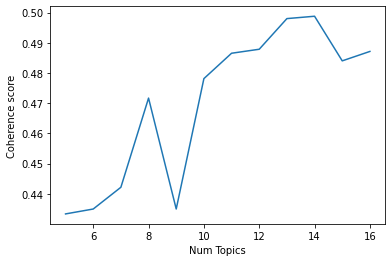

In [17]:
# Show graph
limit=17; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('20240221_PhD_MalletLDAChk-Coherence')
plt.show()

In [18]:
# Print the coherence and perplexity scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.4333
Num Topics = 6 Coherence:  0.435
Num Topics = 7 Coherence:  0.4422
Num Topics = 8 Coherence:  0.4717
Num Topics = 9 Coherence:  0.435
Num Topics = 10 Coherence:  0.4781
Num Topics = 11 Coherence:  0.4865
Num Topics = 12 Coherence:  0.4879
Num Topics = 13 Coherence:  0.498
Num Topics = 14 Coherence:  0.4988
Num Topics = 15 Coherence:  0.484
Num Topics = 16 Coherence:  0.4871


In [29]:
# Coherence for 13-topic model
print(coherence_values[8])

# Topics for 13-topic model
malletModel_13 = model_list[8]
model_topics_13 = malletModel_13.show_topics(formatted=False)
pprint(sorted(malletModel_13.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA13 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_13)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA13, corpus, id2word, sort_topics=False, mds='mmds')
vis

0.49801613180747356
[(0,
  '0.069*"country" + 0.053*"people" + 0.036*"state" + 0.021*"world" + '
  '0.020*"find" + 0.016*"person" + 0.015*"labour" + 0.014*"obtain" + '
  '0.013*"employment" + 0.012*"difficulty"'),
 (1,
  '0.044*"house" + 0.040*"place" + 0.025*"river" + 0.021*"wood" + 0.019*"road" '
  '+ 0.016*"tree" + 0.015*"town" + 0.015*"grow" + 0.014*"building" + '
  '0.014*"water"'),
 (2,
  '0.025*"call" + 0.024*"head" + 0.019*"eye" + 0.015*"body" + 0.014*"night" + '
  '0.014*"mind" + 0.013*"hand" + 0.013*"fire" + 0.013*"pass" + 0.012*"life"'),
 (3,
  '0.059*"time" + 0.045*"give" + 0.043*"bring" + 0.028*"find" + 0.027*"woman" '
  '+ 0.027*"hand" + 0.025*"thing" + 0.023*"leave" + 0.022*"remain" + '
  '0.022*"room"'),
 (4,
  '0.060*"letter" + 0.045*"friend" + 0.042*"family" + 0.034*"write" + '
  '0.029*"send" + 0.028*"child" + 0.026*"girl" + 0.023*"live" + 0.021*"feel" + '
  '0.020*"brother"'),
 (5,
  '0.088*"sister" + 0.018*"school" + 0.014*"visit" + 0.013*"man" + '
  '0.013*"place"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.264025 -0.409873       1        1  7.668930
1     -0.186857  0.024150       2        1  7.780685
2     -0.465237  0.116494       3        1  7.610619
3      0.186844  0.006277       4        1  7.460173
4     -0.025938 -0.346832       5        1  7.718598
5      0.145831  0.446820       6        1  8.192856
6     -0.080549  0.411532       7        1  7.663454
7     -0.283507  0.336012       8        1  7.671877
8     -0.400704 -0.188790       9        1  7.471124
9      0.195433 -0.439002      10        1  7.671262
10     0.360213 -0.246876      11        1  7.543381
11     0.481520  0.014855      12        1  8.097762
12     0.336977  0.275232      13        1  7.449278, topic_info=        Term         Freq        Total Category  logprob  loglift
34    sister  1301.000000  1301.000000  Default  30.0000  30.0000
135      day  1637.000000  1637.000000  Default  29.0000  29.0000
189     work  1189.000000  1189.000000  Default  28.0000  28.0000
659  country  1247.000000  1247.000000  Default  27.0000  27.0000
268     time  1683.000000  1683.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
71    matter   102.176858   192.113355  Topic13  -4.8780   1.9657
95      mind   117.725510   410.326106  Topic13  -4.7364   1.3485
580   change   106.619330   272.054952  Topic13  -4.8355   1.6603
397     call   108.840566   712.322881  Topic13  -4.8148   0.7184
317   expect    99.955622   405.459328  Topic13  -4.9000   1.1968

[1004 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2069      9  0.995375        accept
761       4  0.720517       account
761       8  0.276562       account
2716      5  0.996110  acquaintance
1117     12  1.017265       acquire
...     ...       ...           ...
130       1  0.126141          year
130       5  0.116080          year
130       8  0.284010          year
130      12  0.472834          year
286      11  0.998434     yesterday

[1274 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [30]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA13, corpus, id2word, sort_topics=False)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.238834  0.156779       1        1  7.668932
1     -0.239174 -0.095656       2        1  7.780685
2      0.054887 -0.125901       3        1  7.610613
3      0.138952 -0.082684       4        1  7.460176
4      0.171144  0.254638       5        1  7.718600
5      0.044098 -0.166950       6        1  8.192851
6      0.018706 -0.081064       7        1  7.663454
7     -0.122719 -0.079711       8        1  7.671879
8      0.125563  0.238605       9        1  7.471124
9     -0.012100 -0.160224      10        1  7.671258
10     0.182334 -0.011607      11        1  7.543392
11    -0.217127  0.179182      12        1  8.097761
12     0.094270 -0.025406      13        1  7.449276, topic_info=        Term         Freq        Total Category  logprob  loglift
34    sister  1301.000000  1301.000000  Default  30.0000  30.0000
135      day  1637.000000  1637.000000  Default  29.0000  29.0000
189     work  1189.000000  1189.000000  Default  28.0000  28.0000
659  country  1247.000000  1247.000000  Default  27.0000  27.0000
268     time  1683.000000  1683.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
71    matter   102.176830   192.113252  Topic13  -4.8780   1.9657
95      mind   117.725478   410.325905  Topic13  -4.7364   1.3485
580   change   106.619300   272.054997  Topic13  -4.8355   1.6603
397     call   108.840536   712.322615  Topic13  -4.8148   0.7184
317   expect    99.955594   405.459589  Topic13  -4.9000   1.1968

[1002 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
2069      9  0.995375        accept
761       4  0.720517       account
761       8  0.276562       account
2716      5  0.996110  acquaintance
1118     12  1.000065          acre
...     ...       ...           ...
130       5  0.116080          year
130       8  0.284010          year
130      12  0.472834          year
286      11  0.998433     yesterday
6537      5  0.959217          youe

[1272 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [33]:
# Coherence for 14-topic model
print(coherence_values[9])

# Topics for 14-topic model
malletModel_14 = model_list[9]
model_topics_14 = malletModel_14.show_topics(formatted=False)
pprint(sorted(malletModel_14.print_topics(num_words=10)))

# Convert results to lda model format for visualization.
MalletLDA14 = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(malletModel_14)

# Visualize the topics
pyLDAvis.enable_notebook()
vis14 = pyLDAvis.gensim.prepare(MalletLDA14, corpus, id2word, sort_topics=False, mds='mmds')
vis14

0.498796140159795
[(0,
  '0.072*"work" + 0.066*"man" + 0.033*"mind" + 0.028*"find" + 0.028*"people" + '
  '0.021*"woman" + 0.017*"body" + 0.013*"world" + 0.012*"life" + '
  '0.011*"study"'),
 (1,
  '0.069*"country" + 0.026*"settle" + 0.021*"person" + 0.020*"people" + '
  '0.019*"obtain" + 0.018*"land" + 0.017*"settlement" + 0.017*"labour" + '
  '0.016*"arrive" + 0.016*"government"'),
 (2,
  '0.049*"year" + 0.028*"book" + 0.024*"expect" + 0.022*"read" + 0.021*"pay" + '
  '0.019*"interest" + 0.015*"copy" + 0.014*"draw" + 0.014*"month" + '
  '0.013*"feel"'),
 (3,
  '0.032*"life" + 0.028*"heart" + 0.024*"wife" + 0.022*"die" + 0.020*"death" + '
  '0.016*"live" + 0.015*"hold" + 0.015*"call" + 0.015*"husband" + 0.014*"eye"'),
 (4,
  '0.090*"time" + 0.057*"give" + 0.043*"hand" + 0.030*"day" + 0.027*"head" + '
  '0.025*"remain" + 0.024*"call" + 0.023*"bring" + 0.018*"case" + '
  '0.017*"return"'),
 (5,
  '0.041*"day" + 0.025*"night" + 0.024*"hour" + 0.024*"morning" + 0.023*"ship" '
  '+ 0.023*"

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.123975  0.078049       1        1  6.986785
1      0.058310 -0.473863       2        1  7.086888
2     -0.119855 -0.230489       3        1  6.854108
3     -0.077692  0.459093       4        1  6.974264
4      0.425518 -0.192348       5        1  6.991484
5      0.230885 -0.297374       6        1  7.326491
6      0.180143  0.446208       7        1  6.933801
7     -0.238414 -0.433309       8        1  7.480855
8     -0.476308  0.077738       9        1  7.279098
9      0.361920  0.270483      10        1  7.034790
10     0.463837  0.028906      11        1  7.061455
11    -0.168213  0.122148      12        1  7.185311
12    -0.432477 -0.175916      13        1  7.567091
13    -0.331627  0.320673      14        1  7.237579, topic_info=        Term         Freq        Total Category  logprob  loglift
34    sister  1311.000000  1311.000000  Default  30.0000  30.0000
268     time  1681.000000  1681.000000  Default  29.0000  29.0000
125     send   977.000000   977.000000  Default  28.0000  28.0000
92      give  1542.000000  1542.000000  Default  27.0000  27.0000
130     year  1320.000000  1320.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
2274  employ    90.150889   164.796380  Topic14  -4.9744   2.0227
119     kind    98.840131   406.932127  Topic14  -4.8824   1.2107
604    water    99.926286   452.053006  Topic14  -4.8715   1.1165
280   person    95.581665   479.305131  Topic14  -4.9159   1.0135
178    house    90.150889   737.433934  Topic14  -4.9744   0.5242

[1052 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2827      8  0.990495  abundance
2069      3  0.999501     accept
308       5  0.998629   accident
131      11  0.147875  accompany
131      13  0.855563  accompany
...     ...       ...        ...
130       8  0.536282       year
130      12  0.000757       year
130      13  0.000757       year
286      10  0.995757  yesterday
2435      4  1.002007      youth

[1338 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [32]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(MalletLDA14, corpus, id2word, sort_topics=False)
vis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.052483 -0.064921       1        1  6.986785
1     -0.238278 -0.075624       2        1  7.086894
2     -0.018034 -0.155432       3        1  6.854102
3      0.049047 -0.070618       4        1  6.974267
4      0.232259 -0.068487       5        1  6.991485
5      0.038612  0.254918       6        1  7.326485
6      0.161368 -0.148474       7        1  6.933802
7     -0.224229 -0.117232       8        1  7.480854
8     -0.120072  0.236665       9        1  7.279094
9      0.139481  0.102799      10        1  7.034793
10     0.224725 -0.083352      11        1  7.061460
11    -0.106830 -0.065226      12        1  7.185307
12     0.043839  0.241321      13        1  7.567091
13    -0.129405  0.013663      14        1  7.237581, topic_info=        Term         Freq        Total Category  logprob  loglift
34    sister  1311.000000  1311.000000  Default  30.0000  30.0000
268     time  1681.000000  1681.000000  Default  29.0000  29.0000
125     send   977.000000   977.000000  Default  28.0000  28.0000
92      give  1542.000000  1542.000000  Default  27.0000  27.0000
130     year  1320.000000  1320.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
2274  employ    90.150913   164.796362  Topic14  -4.9744   2.0227
119     kind    98.840158   406.932180  Topic14  -4.8824   1.2107
604    water    99.926313   452.052781  Topic14  -4.8715   1.1165
280   person    95.581691   479.305330  Topic14  -4.9159   1.0135
178    house    90.150913   737.433588  Topic14  -4.9744   0.5242

[1041 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2827      8  0.990495  abundance
2069      3  0.999502     accept
308       5  0.998629   accident
131      11  0.147875  accompany
131      13  0.855562  accompany
...     ...       ...        ...
130       8  0.536283       year
130      12  0.000757       year
130      13  0.000757       year
286      10  0.995757  yesterday
2435      4  1.002007      youth

[1327 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

Going with the 14-topic model because it has good metrics and accords well with the letter results. 

In [37]:
malletModel_14.save('20240221_PhD_TopicChkMAL14')
pyLDAvis.save_html(vis14, '20240221_PhD_TopicChkMAL14.html')